In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
import requests

url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/EB227F375EE8/2022-11-18%2012:56:00.000/2022-11-18%2014:00:00.000"

reponse = requests.get(url)
print(reponse)
contenu = reponse.json()
print(type(contenu))
contenu['resultat']

<Response [200]>
<class 'dict'>


[{'timestamp': '2022-11-18 13:59:53.227',
  'macModule': 'C45BBE386952',
  'rssi': -77},
 {'timestamp': '2022-11-18 13:59:50.303',
  'macModule': 'C45BBE39F56A',
  'rssi': -76},
 {'timestamp': '2022-11-18 13:59:43.527',
  'macModule': 'C45BBE386952',
  'rssi': -69},
 {'timestamp': '2022-11-18 13:59:42.531',
  'macModule': 'C45BBE39F56A',
  'rssi': -74},
 {'timestamp': '2022-11-18 13:59:41.098',
  'macModule': 'C45BBE37B346',
  'rssi': -80},
 {'timestamp': '2022-11-18 13:59:33.363',
  'macModule': 'C45BBE37B346',
  'rssi': -78},
 {'timestamp': '2022-11-18 13:59:32.783',
  'macModule': 'C45BBE39F56A',
  'rssi': -76},
 {'timestamp': '2022-11-18 13:59:31.912',
  'macModule': 'C45BBE386952',
  'rssi': -76},
 {'timestamp': '2022-11-18 13:59:23.112',
  'macModule': 'C45BBE39F56A',
  'rssi': -74},
 {'timestamp': '2022-11-18 13:59:21.848',
  'macModule': 'C45BBE37B346',
  'rssi': -72},
 {'timestamp': '2022-11-18 13:59:20.392',
  'macModule': 'C45BBE386952',
  'rssi': -73},
 {'timestamp': '2022-

In [64]:
df_2 = pd.DataFrame(contenu['resultat'])
df_2["macModule"].unique()
df_2["date"] = pd.to_datetime(df_2["timestamp"])
df_2 = df_2.sort_values('timestamp').reset_index()
df_2['Time'] = pd.to_datetime(df_2['date']).dt.time
df_2['hourMinute'] = df_2.date.dt.hour.astype(str) + 'h' + df_2.date.dt.minute.astype(str)
df_2=df_2.drop(columns=["timestamp","date","Time","index"])

In [65]:
df_2

,macModule,rssi,hourMinute
0,A8032A31204E,-59,12h56
1,C45BBE37B346,-73,12h56
2,C45BBE37B346,-78,12h56
3,A8032A31204E,-70,12h56
4,A8032A31204E,-60,12h56
...,...,...,...
1002,C45BBE37B346,-80,13h59
1003,C45BBE39F56A,-74,13h59
1004,C45BBE386952,-69,13h59
1005,C45BBE39F56A,-76,13h59


In [66]:
df_2.to_csv('bd2.csv', index=False) 

In [67]:
# df_2=pd.read_csv("bd.csv")

In [68]:
df_2["macModule"].unique()

array(['A8032A31204E', 'C45BBE37B346', 'C45BBE39F9AE', 'A8032A311FAA',
       'C45BBE39F56A', 'C45BBE386952', 'C45BBE384CD2', 'C45BBE386362'],
      dtype=object)

In [69]:
my_map={'A8032A31204E':"A8032A31204E_29m", 'C45BBE37B346':"C45BBE37B346_52m", 'C45BBE39F9AE':"C45BBE39F9AE_13m", 'A8032A311FAA':"A8032A311FAA_4m",
       'C45BBE39F56A':"C45BBE39F56A_56m", 'C45BBE386952':"C45BBE386952_65m", 'C45BBE384CD2':"C45BBE384CD2_89m", 'C45BBE386362':"C45BBE386362_80m"}
df_2["macModule"]=df_2["macModule"].map(my_map)

In [70]:
df_2

,macModule,rssi,hourMinute
0,A8032A31204E_29m,-59,12h56
1,C45BBE37B346_52m,-73,12h56
2,C45BBE37B346_52m,-78,12h56
3,A8032A31204E_29m,-70,12h56
4,A8032A31204E_29m,-60,12h56
...,...,...,...
1002,C45BBE37B346_52m,-80,13h59
1003,C45BBE39F56A_56m,-74,13h59
1004,C45BBE386952_65m,-69,13h59
1005,C45BBE39F56A_56m,-76,13h59


In [71]:
#list_mac = ['A8032A311FAA', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE39F42A', 'C45BBE37B346',   'C45BBE39F56A', 'C45BBE386952', 'C45BBE386362' ,  'C45BBE384CD2']

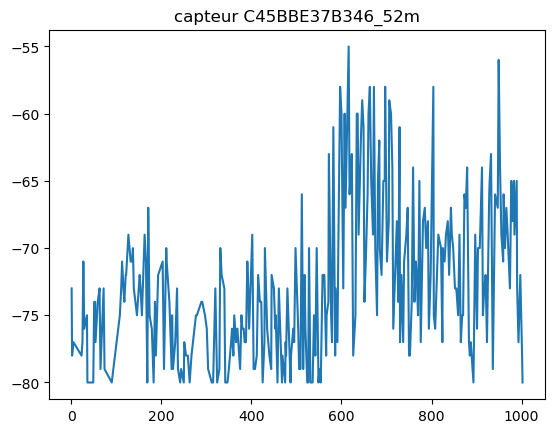

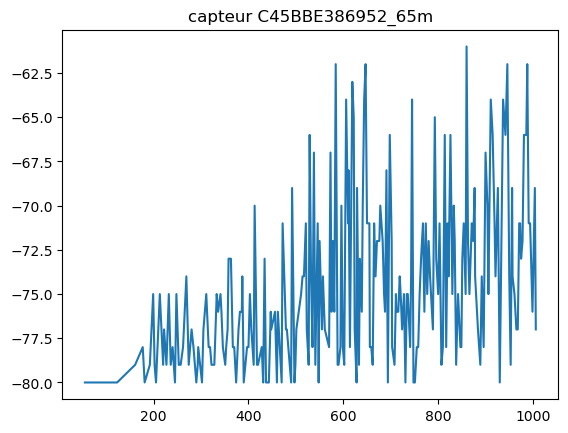

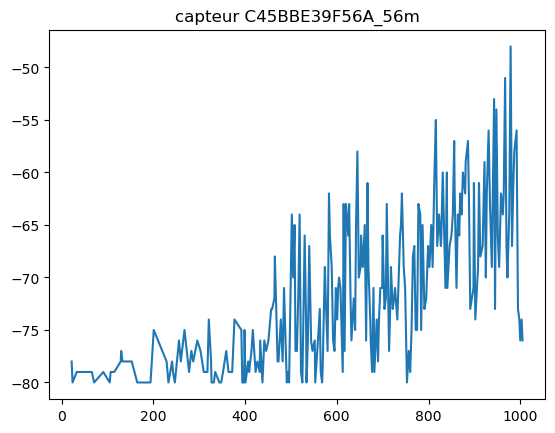

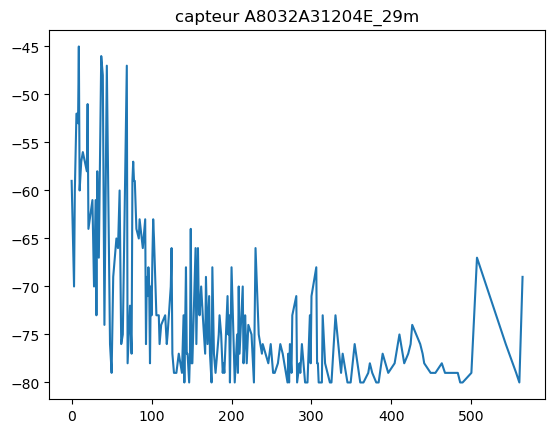

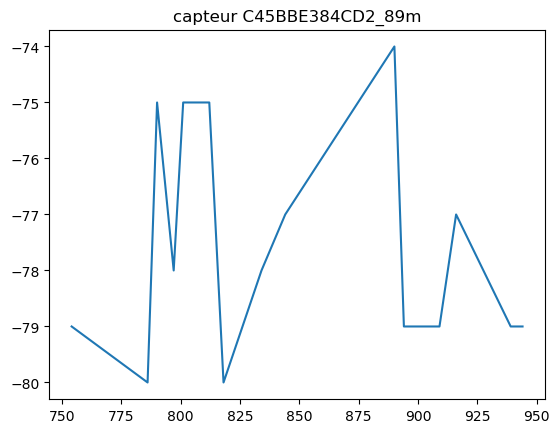

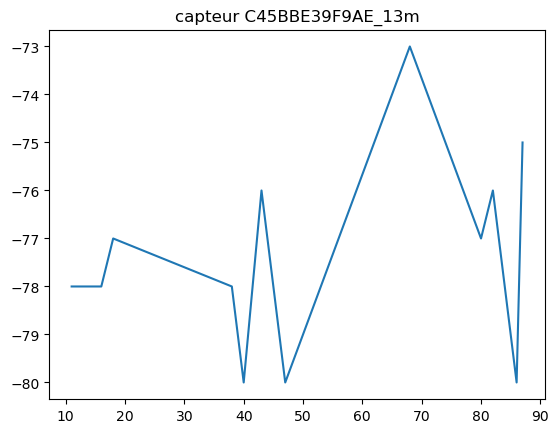

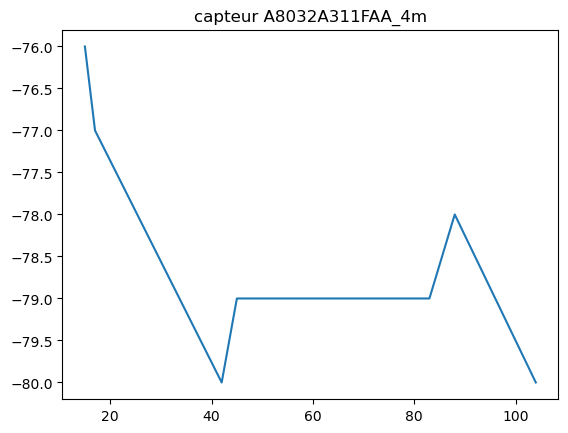

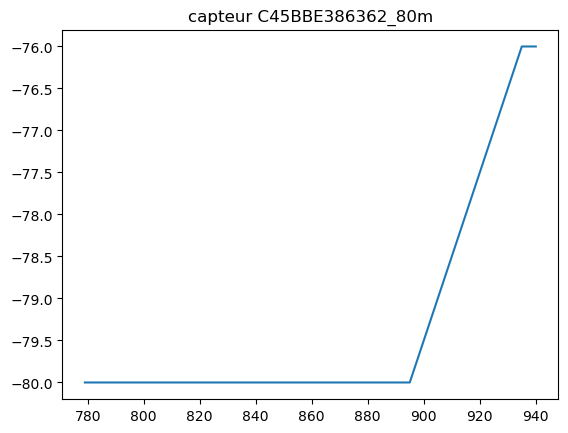

In [72]:
for mac in df_2.macModule.value_counts().keys().tolist():
    df_2[df_2.macModule == mac]['rssi'].plot()
    plt.title('capteur '+ mac)
    plt.show()

In [73]:
#list_mac = ['A8032A311FAA', 'C45BBE39F9AE', 'A8032A31204E', 'C45BBE39F42A', 'C45BBE37B346',   'C45BBE39F56A', 'C45BBE386952', 'C45BBE386362' ,  'C45BBE384CD2']

In [74]:
exp = pd.read_csv('Mesures_18_11.csv')
df = df_2.merge(exp, left_on ='hourMinute', right_on='heure', how='left')
df=df.drop(columns=["hourMinute","heure"])

In [75]:
# df=df[(df["macModule"]!="A8032A30FBFE")&(df["macModule"]!="C45BBE38FEAA")]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   macModule     1007 non-null   object
 1   rssi          1007 non-null   int64 
 2   Position (m)  1007 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ KB


In [77]:
capteurs=df["macModule"].unique()
df_final={}
df1=pd.DataFrame()
positions=df["Position (m)"].unique()
for p in positions:
    df_final[p]=pd.DataFrame()
    for c in capteurs:
       df1=df[df["Position (m)"]==p]
       df_final[p][c]=pd.Series(df1[df1["macModule"]==c]["rssi"].values)

In [78]:
capteurs=df["macModule"].unique()
df_final2={}
df2=pd.DataFrame()
positions=df["Position (m)"].unique()
for p in capteurs:
    df_final2[p]=pd.DataFrame()
    for c in positions:
       df2=df[df["macModule"]==p]
       df_final2[p][c]=pd.Series(df2[df2["Position (m)"]==c]["rssi"].values)

In [79]:
for p in capteurs:
    print(df_final2[p].describe())

              30         31         32         33         34         35  \
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean  -56.083333 -62.083333 -68.583333 -65.000000 -71.250000 -75.416667   
std     6.244391  10.655415   9.662094   5.460603   4.433857   4.166061   
min   -70.000000 -76.000000 -79.000000 -76.000000 -78.000000 -80.000000   
25%   -59.250000 -70.750000 -76.250000 -68.250000 -73.250000 -79.000000   
50%   -56.500000 -62.500000 -70.500000 -64.500000 -73.000000 -76.500000   
75%   -52.000000 -55.500000 -63.750000 -62.000000 -69.250000 -73.750000   
max   -45.000000 -46.000000 -47.000000 -57.000000 -63.000000 -66.000000   

              36         37         38         39  ...   51   52   53   54  \
count  12.000000  12.000000  11.000000  12.000000  ...  0.0  0.0  0.0  0.0   
mean  -73.250000 -74.166667 -75.090909 -75.416667  ...  NaN  NaN  NaN  NaN   
std     5.722762   4.041452   3.727051   3.260182  ...  NaN  NaN  NaN  NaN   
min   -80.00

In [80]:
for p in positions:
    print(df_final[p].describe())

       A8032A31204E_29m  C45BBE37B346_52m  C45BBE39F9AE_13m  A8032A311FAA_4m  \
count         12.000000          3.000000              4.00         2.000000   
mean         -56.083333        -76.000000            -77.75       -76.500000   
std            6.244391          2.645751              0.50         0.707107   
min          -70.000000        -78.000000            -78.00       -77.000000   
25%          -59.250000        -77.500000            -78.00       -76.750000   
50%          -56.500000        -77.000000            -78.00       -76.500000   
75%          -52.000000        -75.000000            -77.75       -76.250000   
max          -45.000000        -73.000000            -77.00       -76.000000   

       C45BBE39F56A_56m  C45BBE386952_65m  C45BBE384CD2_89m  C45BBE386362_80m  
count               0.0               0.0               0.0               0.0  
mean                NaN               NaN               NaN               NaN  
std                 NaN               N

In [81]:
for p in capteurs:
    print(df_final2[p])

    30  31  32  33  34  35  36  37    38  39  ...  51  52  53  54  55  56  57  \
0  -59 -64 -79 -57 -70 -76 -68 -73 -75.0 -80  ... NaN NaN NaN NaN NaN NaN NaN   
1  -70 -61 -69 -59 -78 -75 -77 -70 -73.0 -75  ... NaN NaN NaN NaN NaN NaN NaN   
2  -60 -70 -65 -59 -70 -70 -77 -73 -75.0 -79  ... NaN NaN NaN NaN NaN NaN NaN   
3  -52 -61 -66 -64 -73 -66 -80 -77 -79.0 -70  ... NaN NaN NaN NaN NaN NaN NaN   
4  -52 -73 -60 -65 -67 -77 -77 -69 -78.0 -77  ... NaN NaN NaN NaN NaN NaN NaN   
5  -53 -58 -76 -63 -63 -79 -64 -76 -79.0 -70  ... NaN NaN NaN NaN NaN NaN NaN   
6  -45 -67 -75 -66 -65 -79 -78 -71 -71.0 -78  ... NaN NaN NaN NaN NaN NaN NaN   
7  -60 -46 -47 -63 -73 -77 -78 -77 -75.0 -76  ... NaN NaN NaN NaN NaN NaN NaN   
8  -57 -48 -78 -76 -73 -79 -66 -80 -73.0 -73  ... NaN NaN NaN NaN NaN NaN NaN   
9  -56 -74 -72 -69 -76 -73 -76 -68 -80.0 -78  ... NaN NaN NaN NaN NaN NaN NaN   
10 -58 -47 -77 -71 -74 -80 -66 -77 -68.0 -74  ... NaN NaN NaN NaN NaN NaN NaN   
11 -51 -76 -59 -68 -73 -74 -

In [82]:
for p in positions:
    print(df_final[p])

    A8032A31204E_29m  C45BBE37B346_52m  C45BBE39F9AE_13m  A8032A311FAA_4m  \
0                -59             -73.0             -78.0            -76.0   
1                -70             -78.0             -78.0            -77.0   
2                -60             -77.0             -78.0              NaN   
3                -52               NaN             -77.0              NaN   
4                -52               NaN               NaN              NaN   
5                -53               NaN               NaN              NaN   
6                -45               NaN               NaN              NaN   
7                -60               NaN               NaN              NaN   
8                -57               NaN               NaN              NaN   
9                -56               NaN               NaN              NaN   
10               -58               NaN               NaN              NaN   
11               -51               NaN               NaN              NaN   

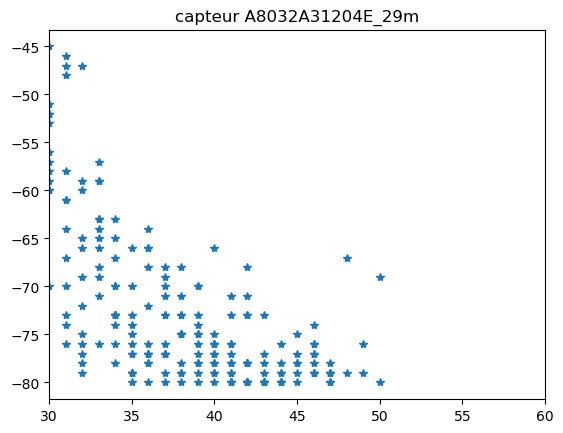

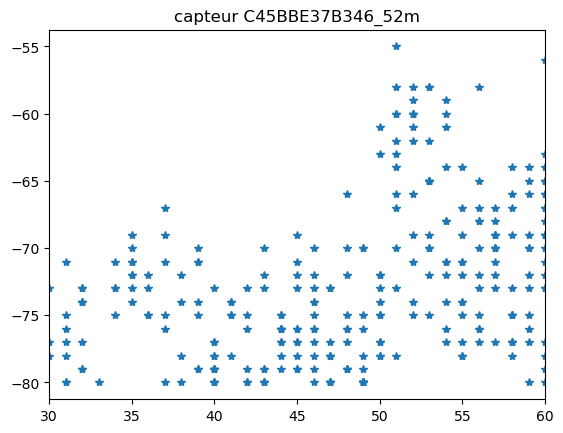

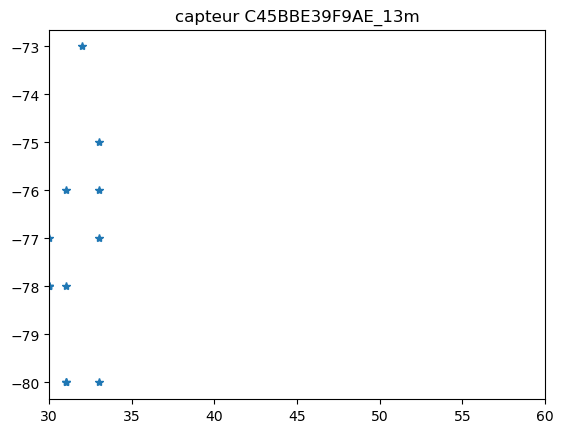

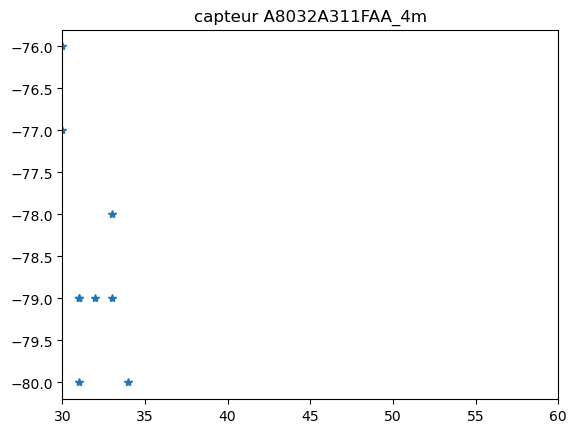

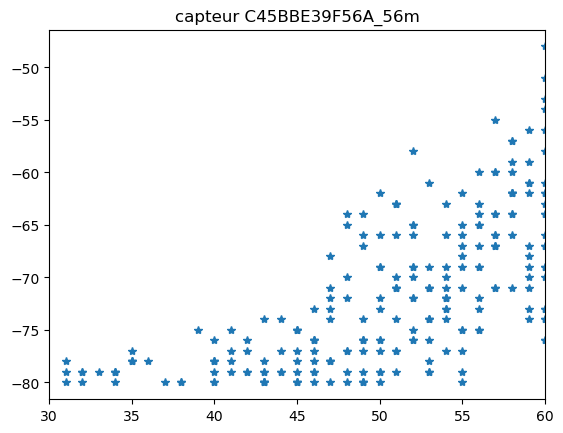

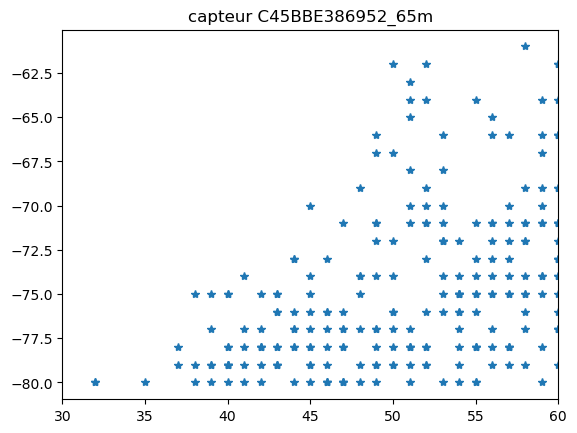

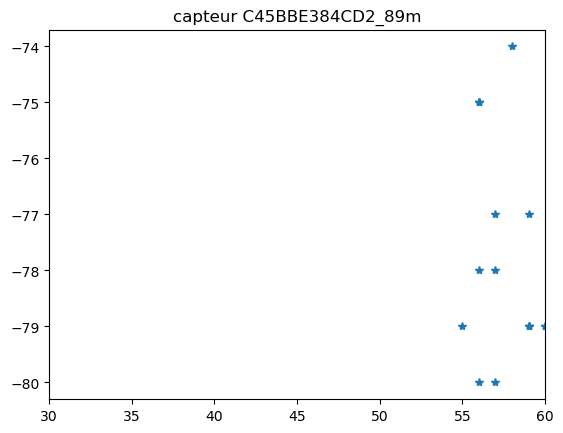

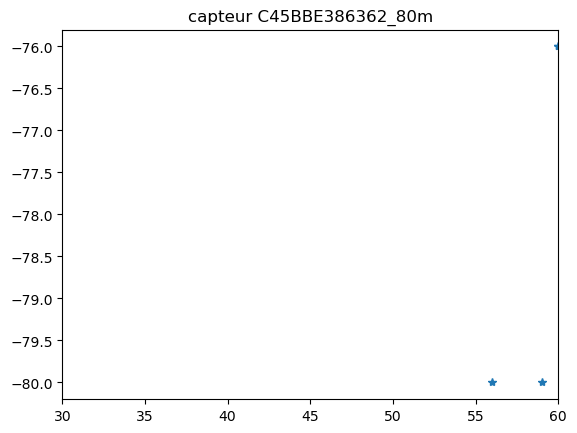

In [196]:
for d in capteurs:
    df3=df[df["macModule"]==d]
    plt.plot(df3["Position (m)"],df3["rssi"],"*")
    plt.title("capteur "+d)
    plt.xlim(30,60)
    plt.show()

In [84]:
# for p in positions:
#     df_final[p].to_csv('df_pos2_'+str(p)+'.csv', index=False) 


In [85]:
# for p in capteurs:
#     df_final2[p].to_csv('df_cap2_'+str(p)+'.csv', index=False) 


In [86]:
for p in positions:
    s=pd.read_csv('C:\\Users\\abdel\\Desktop\\Capteurs\\Positions\\df_pos2_'+str(p)+'.csv') 
    print(p,":")
    print(s,"\n")

30 :
    A8032A31204E  C45BBE37B346  C45BBE39F9AE  A8032A311FAA  C45BBE39F56A  \
0            -59         -73.0         -78.0         -76.0           NaN   
1            -70         -78.0         -78.0         -77.0           NaN   
2            -60         -77.0         -78.0           NaN           NaN   
3            -52           NaN         -77.0           NaN           NaN   
4            -52           NaN           NaN           NaN           NaN   
5            -53           NaN           NaN           NaN           NaN   
6            -45           NaN           NaN           NaN           NaN   
7            -60           NaN           NaN           NaN           NaN   
8            -57           NaN           NaN           NaN           NaN   
9            -56           NaN           NaN           NaN           NaN   
10           -58           NaN           NaN           NaN           NaN   
11           -51           NaN           NaN           NaN           NaN   

    C4

In [89]:
capteurs2=['A8032A31204E', 'C45BBE37B346', 'C45BBE39F9AE',
       'A8032A311FAA', 'C45BBE39F56A', 'C45BBE386952',
       'C45BBE384CD2', 'C45BBE386362']

In [90]:
for p in capteurs2:
    s=pd.read_csv('C:\\Users\\abdel\\Desktop\\Capteurs\\Capteurs\\df_cap2_'+str(p)+'.csv') 
    print(p,":")
    print(s,"\n")

A8032A31204E :
    30  31  32  33  34  35  36  37    38  39  ...  51  52  53  54  55  56  57  \
0  -59 -64 -79 -57 -70 -76 -68 -73 -75.0 -80  ... NaN NaN NaN NaN NaN NaN NaN   
1  -70 -61 -69 -59 -78 -75 -77 -70 -73.0 -75  ... NaN NaN NaN NaN NaN NaN NaN   
2  -60 -70 -65 -59 -70 -70 -77 -73 -75.0 -79  ... NaN NaN NaN NaN NaN NaN NaN   
3  -52 -61 -66 -64 -73 -66 -80 -77 -79.0 -70  ... NaN NaN NaN NaN NaN NaN NaN   
4  -52 -73 -60 -65 -67 -77 -77 -69 -78.0 -77  ... NaN NaN NaN NaN NaN NaN NaN   
5  -53 -58 -76 -63 -63 -79 -64 -76 -79.0 -70  ... NaN NaN NaN NaN NaN NaN NaN   
6  -45 -67 -75 -66 -65 -79 -78 -71 -71.0 -78  ... NaN NaN NaN NaN NaN NaN NaN   
7  -60 -46 -47 -63 -73 -77 -78 -77 -75.0 -76  ... NaN NaN NaN NaN NaN NaN NaN   
8  -57 -48 -78 -76 -73 -79 -66 -80 -73.0 -73  ... NaN NaN NaN NaN NaN NaN NaN   
9  -56 -74 -72 -69 -76 -73 -76 -68 -80.0 -78  ... NaN NaN NaN NaN NaN NaN NaN   
10 -58 -47 -77 -71 -74 -80 -66 -77 -68.0 -74  ... NaN NaN NaN NaN NaN NaN NaN   
11 -51 -76 -5

In [169]:
import requests

url = "https://cartobat.com/434152544F42415450616C616973656175/getRawDataForCartoWear/EB227F375EE8/2022-11-25%2009:53:00.000/2022-11-25%2009:54:00.000"

reponse = requests.get(url)
print(reponse)
contenu = reponse.json()
print(type(contenu))
contenu['resultat']

<Response [200]>
<class 'dict'>


[{'timestamp': '2022-11-25 09:53:59.302',
  'macModule': 'A8032A31204E',
  'rssi': -77},
 {'timestamp': '2022-11-25 09:53:54.543',
  'macModule': 'C45BBE386952',
  'rssi': -80},
 {'timestamp': '2022-11-25 09:53:54.142',
  'macModule': 'C45BBE37B346',
  'rssi': -76},
 {'timestamp': '2022-11-25 09:53:53.680',
  'macModule': 'C45BBE39F56A',
  'rssi': -78},
 {'timestamp': '2022-11-25 09:53:50.332',
  'macModule': 'C45BBE37B346',
  'rssi': -79},
 {'timestamp': '2022-11-25 09:53:49.745',
  'macModule': 'C45BBE39F56A',
  'rssi': -78},
 {'timestamp': '2022-11-25 09:53:47.546',
  'macModule': 'A8032A31204E',
  'rssi': -79},
 {'timestamp': '2022-11-25 09:53:37.806',
  'macModule': 'A8032A31204E',
  'rssi': -79},
 {'timestamp': '2022-11-25 09:53:34.134',
  'macModule': 'C45BBE39F56A',
  'rssi': -80},
 {'timestamp': '2022-11-25 09:53:33.121',
  'macModule': 'C45BBE37B346',
  'rssi': -72},
 {'timestamp': '2022-11-25 09:53:31.290',
  'macModule': 'C45BBE386952',
  'rssi': -80},
 {'timestamp': '2022-

In [170]:
df_test = pd.DataFrame(contenu['resultat'])
df_test["macModule"].unique()
df_test["date"] = pd.to_datetime(df_test["timestamp"])
df_test = df_test.sort_values('timestamp').reset_index()
df_test['Time'] = pd.to_datetime(df_test['date']).dt.time
df_test['hourMinute'] = df_test.date.dt.hour.astype(str) + 'h' + df_test.date.dt.minute.astype(str)
df_test=df_test.drop(columns=["timestamp","date","Time","index"])

In [171]:
my_map={'A8032A31204E':"A8032A31204E_29m", 'C45BBE37B346':"C45BBE37B346_52m", 'C45BBE39F9AE':"C45BBE39F9AE_13m", 'A8032A311FAA':"A8032A311FAA_4m",
       'C45BBE39F56A':"C45BBE39F56A_56m", 'C45BBE386952':"C45BBE386952_65m", 'C45BBE384CD2':"C45BBE384CD2_89m", 'C45BBE386362':"C45BBE386362_80m"}
df_test["macModule"]=df_test["macModule"].map(my_map)

In [174]:
my_map2={"A8032A31204E_29m":29,"C45BBE37B346_52m":52,"C45BBE39F9AE_13m":13, "A8032A311FAA_4m":4,
       "C45BBE39F56A_56m":56, "C45BBE386952_65m":65, "C45BBE384CD2_89m":89, "C45BBE386362_80m":80}
df_test["Positions"]=df_test["macModule"].map(my_map2)

In [175]:
df_test

,macModule,rssi,hourMinute,Positions
0,C45BBE39F9AE_13m,-80,9h53,13
1,C45BBE37B346_52m,-75,9h53,52
2,C45BBE39F56A_56m,-79,9h53,56
3,A8032A31204E_29m,-75,9h53,29
4,A8032A31204E_29m,-73,9h53,29
5,C45BBE39F56A_56m,-80,9h53,56
6,C45BBE37B346_52m,-75,9h53,52
7,C45BBE37B346_52m,-77,9h53,52
8,A8032A31204E_29m,-72,9h53,29
9,C45BBE39F56A_56m,-71,9h53,56


In [193]:
N=3
l=list()
INDEX=df_test["rssi"].sort_values(ascending=False).index
for i in INDEX[:N]:
   l.append(df_test["Positions"].iloc[i])
print(np.mean(l))

45.666666666666664
